In [2]:
import itertools
import numpy as np  # Import NumPy for numerical operations
import pandas as pd  # Import Pandas for data manipulation
from pathlib import Path
from tqdm.notebook import tqdm
import os
import zipfile
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision.transforms import v2
import torch
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
import random
from torch.utils.data import DataLoader, random_split
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef, confusion_matrix

random.seed(89034320423)

In [38]:
device_name = "cpu"  # default device is CPU
if torch.cuda.is_available():
    device_name = "cuda"  # CUDA for NVIDIA GPU
elif torch.backends.mps.is_available():
    device_name = torch.device("mps")  # Metal Performance Shaders for Apple M-series GPU
device = torch.device(device_name)
print(device_name)

mps


data transformations

In [59]:
root_dir = './cifake'

# Compose your transformations
transform = v2.Compose([
    v2.ToTensor(),
])


test_transform = v2.Compose([
    v2.ToTensor(),
])

dataset = ImageFolder(root=f"{root_dir}/train", transform=transform)
test_dataset = ImageFolder(root=f"{root_dir}/test", transform=test_transform)

train_size = int(0.8 * len(dataset)) #TODO change
val_size = len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=100, shuffle=True,num_workers=2)
test_loader= DataLoader(test_dataset, batch_size=100, shuffle=False,num_workers=2)

In [ ]:
for input, label in test_loader:
    print(input.shape)

In [45]:
class EarlyStopper:
  def __init__(self, patience, min_delta):
      self.patience = patience
      self.min_delta = min_delta
      self.counter = 0
      self.min_validation_loss = float('inf')

  def early_stop(self, validation_loss):
      if validation_loss < self.min_validation_loss:
          self.min_validation_loss = validation_loss
          self.counter = 0
      elif validation_loss > (self.min_validation_loss + self.min_delta):
          self.counter += 1
          if self.counter >= self.patience:
              return True
      return False

In [210]:
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.relu3 = nn.ReLU()

        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256 * 8 * 8, 256)
        self.relu4 = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, 128)
        self.relu5 = nn.ReLU()
        self.fc3 = nn.Linear(128, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        batch_size = x.size()[0]
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)

        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)

        x = self.conv3(x)
        x = self.relu3(x)

        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu4(x)
        
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu5(x)
        x = self.fc3(x)

        return x

Epochs:


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

Validation loss: 0.229725 

Validation accuracy: 0.919900 

Validation F1: 0.919900 

Validation mcc: 0.841345 



  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

Validation loss: 0.213924 

Validation accuracy: 0.926550 

Validation F1: 0.926550 

Validation mcc: 0.855426 



  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

Validation loss: 0.206224 

Validation accuracy: 0.930700 

Validation F1: 0.930700 

Validation mcc: 0.863082 



  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

Validation loss: 0.133421 

Validation accuracy: 0.946450 

Validation F1: 0.946450 

Validation mcc: 0.893342 



  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

Validation loss: 0.131170 

Validation accuracy: 0.944350 

Validation F1: 0.944350 

Validation mcc: 0.889736 



  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

Validation loss: 0.131924 

Validation accuracy: 0.951600 

Validation F1: 0.951600 

Validation mcc: 0.903202 



  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

Validation loss: 0.127879 

Validation accuracy: 0.952350 

Validation F1: 0.952350 

Validation mcc: 0.904777 



  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

Validation loss: 0.127552 

Validation accuracy: 0.952200 

Validation F1: 0.952200 

Validation mcc: 0.904488 

Evaluating on test set:


  0%|          | 0/200 [00:00<?, ?it/s]

Test accuracy: 0.9524
Test F1: 0.9524
Test MCC: 0.9048040716274836


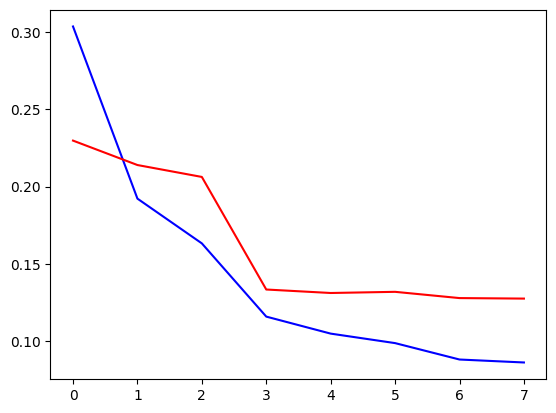

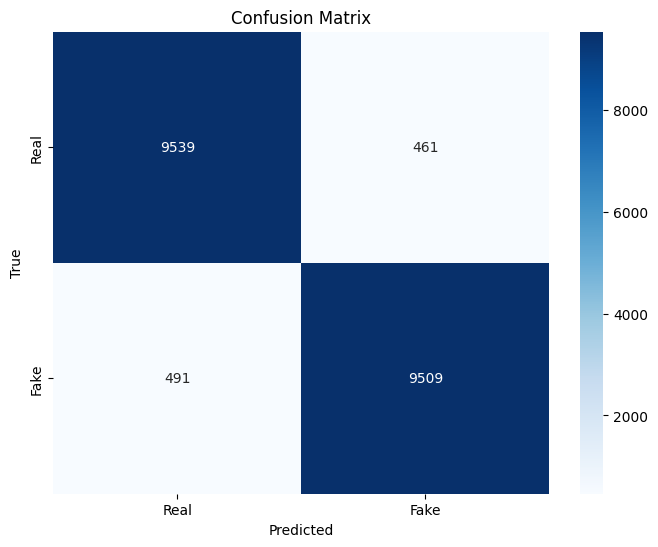

In [211]:
# Wrap your training loop with the Bottleneck profiler

def train(dataloader , model , loss_func, optimizer):

      model.train()
      train_loss = []

      for input, target in tqdm(dataloader):

          input, target = input.to(device), target.to(device)
          pred = model(input)
          pred = torch.squeeze(pred)
          loss = loss_func(pred, target.float())
          #backpropagation
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()
          train_loss.append(loss.item())
      return train_loss

def validate(dataloader, model, loss_func, threshold=0.5):
    model.eval()
    
    num_batches = len(dataloader)
    test_loss= 0
    y_true = []
    y_pred = []

    with torch.no_grad():
      for input, target in tqdm(dataloader):
            input, target = input.to(device), target.to(device)
            pred = model(input)
            pred = torch.squeeze(pred)
            test_loss += loss_func(pred, target.float()).item()
            predicted = (pred >= threshold).float()
            y_true.extend(target.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
          
    test_loss /= num_batches
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average="micro")
    mcc = matthews_corrcoef(y_true, y_pred)
    print(f"Validation loss: {test_loss:>8f} \n")
    print(f"Validation accuracy: {acc:>8f} \n")
    print(f"Validation F1: {f1:>8f} \n")
    print(f"Validation mcc: {mcc:>8f} \n")
    return test_loss


def test(dataloader, model, threshold=0.5):
    model.eval()
    sigmoid = nn.Sigmoid()

    y_true = []
    y_pred = []

    with torch.no_grad():
        print("Evaluating on test set:")
        for input, target in tqdm(dataloader):
            input, target = input.to(device), target.to(device)
            pred = model(input)
            pred = torch.squeeze(pred)
            pred = sigmoid(pred)
            predicted = (pred >= threshold).float()
            y_true.extend(target.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    return {
                "y_true": y_true,
                "y_pred": y_pred,
                "acc": accuracy_score(y_true, y_pred),
                "f1": f1_score(y_true, y_pred, average="micro"),
                "mcc": matthews_corrcoef(y_true, y_pred)
            }


def classify():
    early_stopper = EarlyStopper(patience=2, min_delta=0.01)
    
    input_size = 32*32
    output_size= 1 #isn't this supposed to be 2? for classifications (AI, Human)? #no it's 1 for binary classification
    model = CNN().to(device)
    loss_fun = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.AdamW(model.parameters(), lr = 1e-3)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)
    epochs = 8
    train_loss = []
    test_loss = []

    print("Epochs:")
    for t in tqdm(range(epochs)):
        losses = train(train_loader, model, loss_fun, optimizer)
        train_loss.append(losses)
        validation_loss = validate(val_loader, model, loss_fun)
        test_loss.append(validation_loss)
        if early_stopper.early_stop(validation_loss):
            print("early stop")
            break
        scheduler.step()

    plt.plot([i for i in range(len(train_loss))], torch.tensor(train_loss).mean(axis=1), color="blue") #training loss
    plt.plot([i for i in range(len(test_loss))], test_loss, color="red") #testing loss
    result = test(test_loader, model)
    print(f"Test accuracy: {result['acc']}")
    print(f"Test F1: {result['f1']}")
    print(f"Test MCC: {result['mcc']}")

    conf_matrix = confusion_matrix(result["y_true"], result["y_pred"])

    # Plot confusion matrix
    labels = ['Real', 'Fake']
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    return model

model = classify()

In [212]:
torch.save(model, "./output/model.pt")
torch.save(model.state_dict(), "./output/model_state_dict.pt")

In [48]:
loaded_model = CNN()
loaded_model.load_state_dict(torch.load("./output/model_state_dict.pt"))
loaded_model.to(device)

CNN(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (batchnorm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (batchnorm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3): ReLU()
  (batchnorm3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=16384, out_features=256, bias=True)
  (relu4): ReLU()
  (batchnorm4): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dr

In [180]:
full_model = torch.load("./output/model_full.pt")
full_model.to(device)

CNN(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (batchnorm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (batchnorm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3): ReLU()
  (batchnorm3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=16384, out_features=256, bias=True)
  (relu4): ReLU()
  (batchnorm4): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dr

Evaluating on test set:


  0%|          | 0/200 [00:00<?, ?it/s]

Test accuracy: 0.9626
Test F1: 0.9626000000000001
Test MCC: 0.9252041634281032


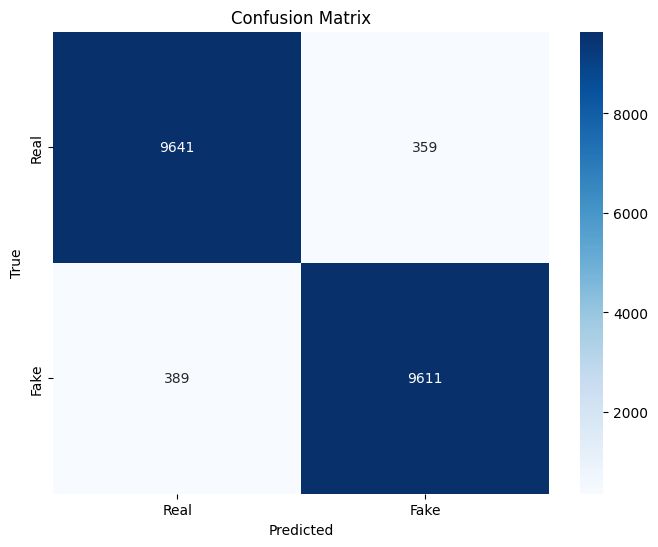

In [229]:
result = test(test_loader, full_model)
print(f"Test accuracy: {result['acc']}")
print(f"Test F1: {result['f1']}")
print(f"Test MCC: {result['mcc']}")

conf_matrix = confusion_matrix(result["y_true"], result["y_pred"])

# Plot confusion matrix
labels = ['Real', 'Fake']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [276]:
from PIL import Image
import numpy as np

# Open the image using Pillow
image_raw = Image.open('./deploy_test/fake/fake1.jpg')
image_raw.resize((32, 32))

# Convert the image to a NumPy array
image = np.array(image_raw)
image = torch.tensor(image, dtype=torch.float32) / 255.0
image = image.transpose(1, 2).transpose(0, 1).unsqueeze(0)
image = image.to(device)
image

tensor([[[[0.5961, 0.5882, 0.6039,  ..., 0.4980, 0.5608, 0.6510],
          [0.6000, 0.5882, 0.5843,  ..., 0.6235, 0.6510, 0.6980],
          [0.6353, 0.6314, 0.6314,  ..., 0.7333, 0.7333, 0.7294],
          ...,
          [0.3686, 0.4471, 0.4196,  ..., 0.6039, 0.6118, 0.6118],
          [0.4627, 0.4471, 0.3686,  ..., 0.6000, 0.6078, 0.6078],
          [0.4510, 0.4314, 0.4039,  ..., 0.5686, 0.5804, 0.5804]],

         [[0.5608, 0.5529, 0.5569,  ..., 0.4275, 0.4902, 0.5804],
          [0.5608, 0.5529, 0.5451,  ..., 0.5529, 0.5765, 0.6275],
          [0.6039, 0.6000, 0.6000,  ..., 0.6667, 0.6667, 0.6627],
          ...,
          [0.2275, 0.3137, 0.2863,  ..., 0.3804, 0.3647, 0.3647],
          [0.3176, 0.3059, 0.2353,  ..., 0.3529, 0.3451, 0.3412],
          [0.2980, 0.2863, 0.2706,  ..., 0.3176, 0.3059, 0.3020]],

         [[0.5020, 0.4941, 0.5020,  ..., 0.3490, 0.4118, 0.5020],
          [0.5137, 0.4941, 0.4980,  ..., 0.4745, 0.5098, 0.5490],
          [0.5608, 0.5490, 0.5569,  ..., 0

In [269]:
from PIL import Image
from torchvision import transforms

image = Image.open('./image.jpg')
to_tensor = transforms.ToTensor()
image_tensor = to_tensor(image)
image_tensor

tensor([[[0.7333, 0.6667, 0.7686,  ..., 1.0000, 0.9451, 0.9725],
         [0.7686, 0.6902, 0.7608,  ..., 0.9176, 0.9059, 0.9843],
         [0.8000, 0.7333, 0.8196,  ..., 0.9922, 0.9843, 0.8824],
         ...,
         [0.4275, 0.3843, 0.3333,  ..., 0.4980, 0.5020, 0.5137],
         [0.4706, 0.4392, 0.4392,  ..., 0.4824, 0.5020, 0.5294],
         [0.5490, 0.5294, 0.5451,  ..., 0.4667, 0.4863, 0.5255]],

        [[0.6784, 0.5882, 0.6471,  ..., 0.9804, 0.9176, 0.9608],
         [0.7098, 0.6118, 0.6471,  ..., 0.8784, 0.8980, 0.9922],
         [0.7569, 0.6667, 0.7137,  ..., 0.9882, 1.0000, 0.9137],
         ...,
         [0.3647, 0.3216, 0.2706,  ..., 0.4627, 0.4510, 0.4588],
         [0.4000, 0.3765, 0.3804,  ..., 0.4510, 0.4510, 0.4745],
         [0.4824, 0.4627, 0.4863,  ..., 0.4353, 0.4353, 0.4706]],

        [[0.4000, 0.3020, 0.3333,  ..., 1.0000, 0.9882, 1.0000],
         [0.3765, 0.2706, 0.2863,  ..., 0.9216, 0.9529, 1.0000],
         [0.3059, 0.2196, 0.2627,  ..., 1.0000, 1.0000, 0.

In [234]:
transform = v2.Compose([
    v2.ToTensor(),
])

deploy_dataset = ImageFolder(root=f"./deploy_test/", transform=transform)
deploy_loader= DataLoader(deploy_dataset, batch_size=1, shuffle=False, num_workers=2)

In [277]:
model = CNN()
model.load_state_dict(torch.load("./output/model_state_dict.pt"))
model.to(device)

CNN(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3): ReLU()
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=16384, out_features=256, bias=True)
  (relu4): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (relu5): ReLU()
  (fc3): Linear(in_features=128, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [278]:
model.eval()
sigmoid = torch.nn.Sigmoid()
with torch.no_grad():
    image = image.to(device)
    logit = model(image)
    prob = sigmoid(logit)
    print(logit)
    print(prob)

tensor([[-11.1084]], device='mps:0')
tensor([[1.4986e-05]], device='mps:0')
